# Dynamic Time Warping Basic


### Motivation

- 한 signal의 어떤 포인트가 다른 signal의 어떤 포인트와 연관이 있는가?  

- 그리고 두 signal의 차이는 얼마나 되는가?  


**DTW**는 적절한 aligning으로 위 질문들에 대답할 수 있다.

이때 poiont들끼리 서로 대응시키기만 할 수 있다면, 어떤 거리 측도(Euclidean ...)를 사용해 signal 간의 거리를 측정할 수 있고, 나아가 Alignment cost를 활용해 **K-nearest-neighbors**를 활용해 signal 간의 clustering도 가능하다.  

DTW는 model이 아니라, 어떤 측도의 개념으로 접근해야 한다.

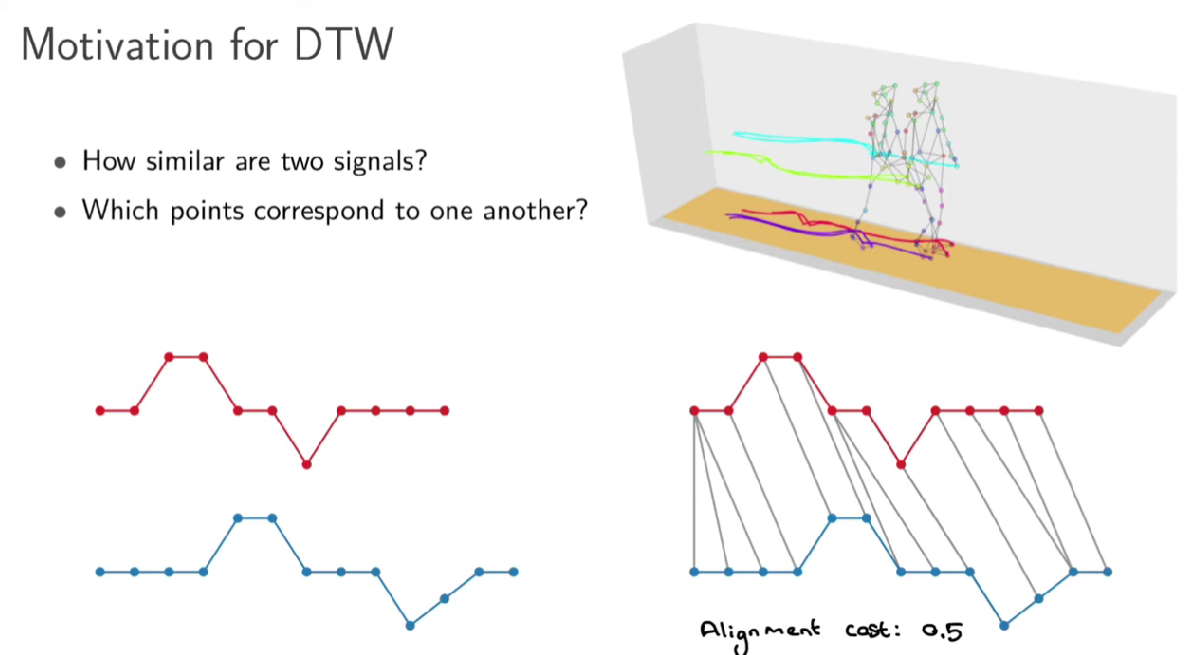

In [3]:
from IPython.display import Image

Image("C:/Users/jy990/Study/Dynamic time warping/Image/1.1.PNG")

### Algorithm

**DTW**의 알고리즘은 아래와 같다.  

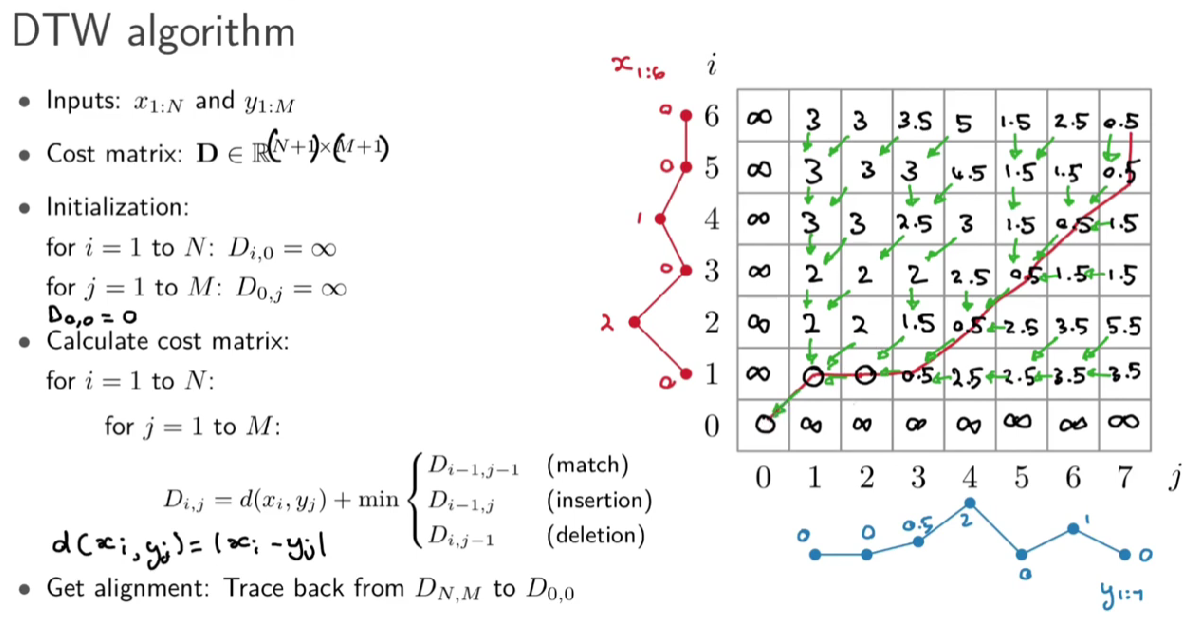

In [4]:
Image("C:/Users/jy990/Study/Dynamic time warping/Image/2.1.PNG")

### Practice

In [5]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

In [6]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

- **Univaraite Example 1 :**

(-0.6000000000000001, 12.6, -2.75, 2.75)

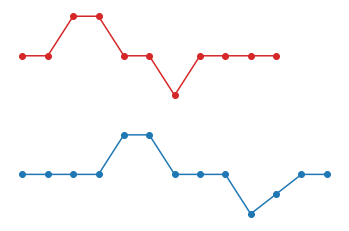

In [9]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

In [10]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 0.5000
Normalized alignment cost: 0.0208


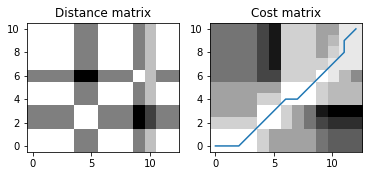

In [11]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-0.6000000000000001, 12.6, -2.75, 2.75)

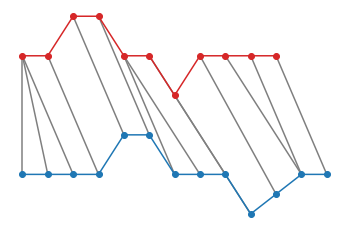

In [13]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 2.5000
Normalized alignment cost: 0.1042

Alignment cost: 1.7500
Normalized alignment cost: 0.0972

Alignment cost: 0.5000
Normalized alignment cost: 0.0208



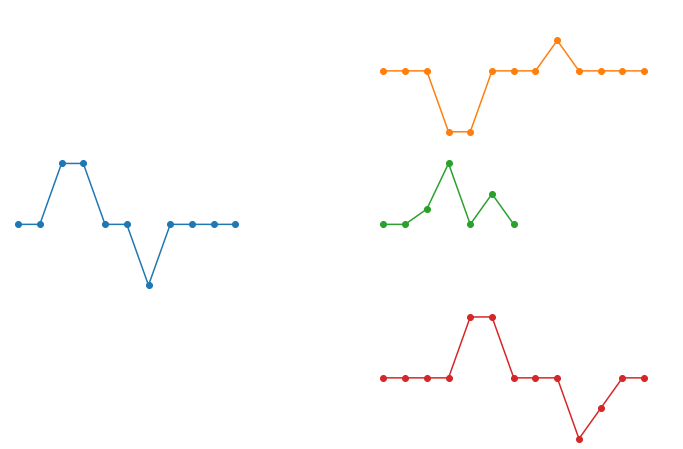

In [15]:
a = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])
c = np.array([0, 0, 0, -1, -1, 0, 0, 0, 0.5, 0, 0, 0, 0])
d = np.array([0, 0, 0.25, 1, 0, 0.5, 0])

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
# fig = plt.figure(figsize=(6, 8))
ax1.plot(np.arange(a.shape[0]), a, "-o", c="C0")
ax2.plot(np.arange(c.shape[0]), c, "-o", c="C1")
ax3.plot(np.arange(d.shape[0]), d, "-o", c="C2")
ax4.plot(np.arange(b.shape[0]), b, "-o", c="C3")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis("off")
    ax.set_xlim([-0.5, 13.5])
    ax.set_ylim([-1.05, 1.05])
    
for cur_b in [c, d, b]:

    # Distance matrix
    N = a.shape[0]
    M = cur_b.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(a[i] - cur_b[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
    print()

- **Univariate Example 2 :**

(0.7, 7.3, -1.75, 3.75)

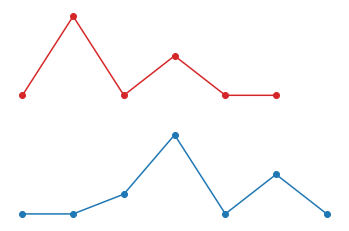

In [17]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")

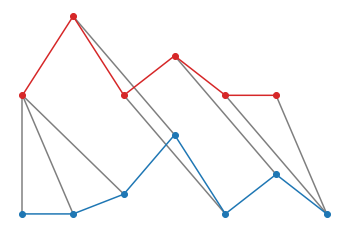

In [18]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

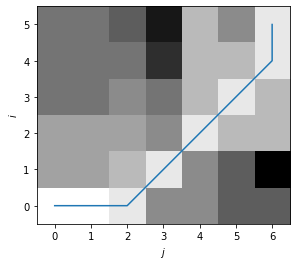

In [19]:
plt.figure(figsize=(6, 4))
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)
plt.xlabel("$j$")
plt.ylabel("$i$");

- **Univariate Example 3 :**

(-0.6000000000000001, 12.6, -1.7, 2.7)

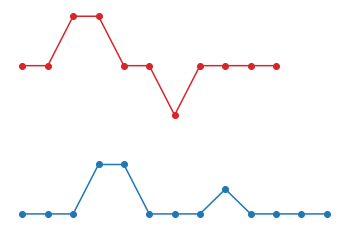

In [21]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

Alignment cost: 1.5000
Normalized alignment cost: 0.0625


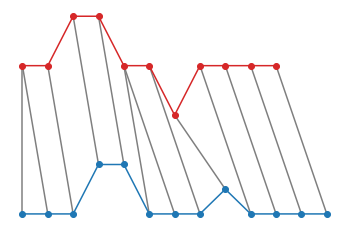

In [22]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

Normalized score란, 전체 거리/(이동한 횟수)로 계산된다. 즉, (0,0) 지점에서 (N,M) 지점까지 도착하는데 몇 번 이동했는지에 대한 비율로 normalize하는 것이다.

- Multivariate Example

Multivariate case에서는 각 point가 vector로 구성되어 있으며, 이 vector 간의 distance를 어떻게 측정할 것인지가 중요하다.

In [25]:
from scipy.io import wavfile
import IPython.display as ipyd
import librosa
import librosa.display

In [29]:
# x_fn = "audio/hello1.wav"
# x_fn = "audio/hello2.wav"
x_fn = "C:/Users/jy990/Study/Dynamic time warping/Image/audio_goodbye.wav"
f_s, x = wavfile.read(x_fn)
ipyd.Audio(rate=f_s, data=x)

In [32]:
# y_fn = "audio/hello3.wav"
y_fn = "C:/Users/jy990/Study/Dynamic time warping/Image/audio_bye.wav"
f_s, y = wavfile.read(y_fn)
ipyd.Audio(rate=f_s, data=y)

In [45]:
# Mel-scale spectrogram
n_fft = int(0.025*f_s)      # 25 ms
hop_length = int(0.01*f_s)  # 10 ms
mel_spec_x = librosa.feature.melspectrogram(
    x/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_x = np.log(mel_spec_x)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_x, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");

TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given

In [34]:
# Mel-scale spectrogram
mel_spec_y = librosa.feature.melspectrogram(
    y/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_y = np.log(mel_spec_y)

# Plot log-Mel spectrogram
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(log_mel_spec_y, origin="lower", interpolation="nearest");
plt.ylabel("Feature dimensions")
plt.xlabel("Frames");

TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 3 keyword-only arguments) were given

In [ ]:
x_seq = log_mel_spec_x.T
y_seq = log_mel_spec_y.T

dist_mat = dist.cdist(x_seq, y_seq, "cosine")
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[-1, -1]))

In [ ]:
fig = plt.figure(figsize=(9, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(313)

ax1.imshow(log_mel_spec_x, origin="lower", interpolation="nearest")
ax2.imshow(log_mel_spec_y, origin="lower", interpolation="nearest")
ax1.axis("off")
ax2.axis("off")

for x_i, y_j in path:
    con = ConnectionPatch(
        xyA=(x_i, 0), xyB=(y_j, log_mel_spec_y.shape[0] - 1), coordsA="data", coordsB="data",
        axesA=ax1, axesB=ax2, color="C7"
        )
    ax2.add_artist(con)

In [ ]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

- **K-nearest-neighbour**

In [ ]:
# Audio
query_fn = "C:/Users/jy990/Study/Dynamic time warping/Image/audio_hello1.wav"
f_s, x = wavfile.read(query_fn)

# Mel-scale spectrogram
mel_spec_x = librosa.feature.melspectrogram(
    x/1.0, sr=f_s, n_mels=40,
    n_fft=n_fft, hop_length=hop_length
    )
log_mel_spec_x = np.log(mel_spec_x)
x_seq = log_mel_spec_x.T

ipyd.Audio(rate=f_s, data=x)

In [ ]:
audio_files = [
    "C:/Users/jy990/Study/Dynamic time warping/Image/audio_hello2.wav", "audio/hello3.wav",
    "C:/Users/jy990/Study/Dynamic time warping/Image/audio_bye.wav", "audio/cat.wav", "audio/goodbye.wav"
    ]
for neighbour_fn in audio_files:
    
    # Mel-scale spectrogaram
    print("Reading:", neighbour_fn)
    f_s, y = wavfile.read(neighbour_fn)
    mel_spec_y = librosa.feature.melspectrogram(
        y/1.0, sr=f_s, n_mels=40,
        n_fft=n_fft, hop_length=hop_length
        )
    log_mel_spec_y = np.log(mel_spec_y)
    y_seq = log_mel_spec_y.T

    dist_mat = dist.cdist(x_seq, y_seq, "cosine")
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[-1, -1]))
    M = y_seq.shape[0]
    N = x_seq.shape[0]
    print(
        "Normalized alignment cost: {:.8f}".format(
        cost_mat[-1, -1]/(M + N))
        )
    print()

In [35]:
# Audio
tmp_fn = "C:/Users/jy990/Study/Dynamic time warping/Image/audio_cat.wav"
f_s, tmp = wavfile.read(tmp_fn)
ipyd.Audio(rate=f_s, data=tmp)